<a href="https://colab.research.google.com/github/ruturaj0626/Data_Science_Project/blob/main/Intership_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Introduction**

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.

#**2. Method**


The analysis follows the steps as below.

1. Review the data structure and clean it if it is necessary.
2. Proceeding Exploratory Data Analysis to review the customer churn situation.
3. Classify and predict the Fraud 
4. Use Algorithm methods to predict and evaluate the performance.
5. Use HyperParameters over models to predict and review the outputs.

#**3.EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df['isFlaggedFraud'].eq(1).sum()

0

In [ ]:
df['isFlaggedFraud'].eq(0).sum()

287567

In [ ]:
df['isFraud'].eq(1).sum()

177

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287568 entries, 0 to 287567
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            287568 non-null  int64  
 1   type            287568 non-null  object 
 2   amount          287568 non-null  float64
 3   nameOrig        287568 non-null  object 
 4   oldbalanceOrg   287568 non-null  float64
 5   newbalanceOrig  287568 non-null  float64
 6   nameDest        287567 non-null  object 
 7   oldbalanceDest  287567 non-null  float64
 8   newbalanceDest  287567 non-null  float64
 9   isFraud         287567 non-null  float64
 10  isFlaggedFraud  287567 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 24.1+ MB


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


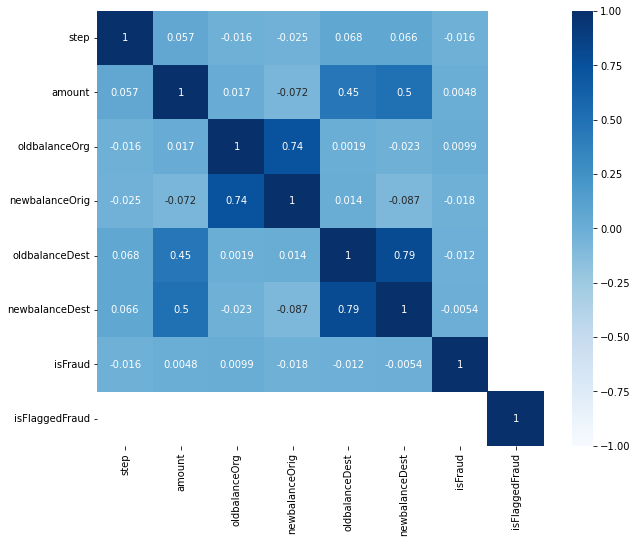

In [ ]:
plt.figure(figsize = (10,8))
ax=sns.heatmap(df.corr(method ='kendall'),annot=True,vmin=-1, vmax=1,cmap='Blues')

The above graph shows that there is a strong correlation between the variables oldbalanceOrg and newbalanceOrig, as well as between oldbalanceDest and newbalanceDest. Usually to avoid the problem of  multi-collinearity, one of these columns should be removed when we'll split the data into the independent and dependent variables i.e is x & y. However, since the number of features is already less, it may not be desirable to remove one of these columns and hence would not be considering to eliminate any of the four features.

#**4. Analyze**

## Feature Engineering 

In [ ]:
from sklearn.preprocessing import LabelEncoder
coded = {}
for i in df.select_dtypes('object').columns:
    coded[i] = LabelEncoder()
    df[i] = coded[i].fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287568 entries, 0 to 287567
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            287568 non-null  int64  
 1   type            287568 non-null  int64  
 2   amount          287568 non-null  float64
 3   nameOrig        287568 non-null  int64  
 4   oldbalanceOrg   287568 non-null  float64
 5   newbalanceOrig  287568 non-null  float64
 6   nameDest        287568 non-null  int64  
 7   oldbalanceDest  287567 non-null  float64
 8   newbalanceDest  287567 non-null  float64
 9   isFraud         287567 non-null  float64
 10  isFlaggedFraud  287567 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 24.1 MB


In [ ]:
df = df.astype('float64')

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,3.0,9839.64,34471.0,170136.0,160296.36,80682.0,0.0,0.0,0.0,0.0
1,1.0,3.0,1864.28,98850.0,21249.0,19384.72,83948.0,0.0,0.0,0.0,0.0
2,1.0,4.0,181.00,45312.0,181.0,0.00,22860.0,0.0,0.0,1.0,0.0
3,1.0,1.0,181.00,263632.0,181.0,0.00,20332.0,21182.0,0.0,1.0,0.0
4,1.0,3.0,11668.14,155442.0,41554.0,29885.86,41580.0,0.0,0.0,0.0,0.0


In [ ]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [ ]:
y.value_counts()

0.0    287390
1.0       177
Name: isFraud, dtype: int64

The data is imbalanced, therefore it is recommended to use SMOTE (Synthetic Minority Over-sampling Technique) to balance it. It's a popular method used to balance class distribution in a dataset. 
By creating synthetic samples, SMOTE allows the algorithm to have a more balanced dataset, which can improve the model's performance and reduce the bias towards the majority class. This method can improve the accuracy of the model, especially when the dataset is highly imbalanced.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
SMOTEE  = SMOTE(random_state=0)

In [ ]:
x,y = SMOTEE.fit_resample(x,y)

In [ ]:
y.value_counts()

0.0    287390
1.0    287390
Name: isFraud, dtype: int64

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x = minmax.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=0)

##4.1 First model Prediction Algorithms:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

##1.KNN Alogrithm

---

In [ ]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.9950515228186685
Testing Accuracy : 0.9924956795063619


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     86106
         1.0       0.99      1.00      0.99     86328

    accuracy                           0.99    172434
   macro avg       0.99      0.99      0.99    172434
weighted avg       0.99      0.99      0.99    172434



##*2. Logistic Regression Alogrithm*

---



In [ ]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.8655361305940658
Testing Accuracy : 0.8643133024809493


              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86     86106
         1.0       0.87      0.86      0.86     86328

    accuracy                           0.86    172434
   macro avg       0.86      0.86      0.86    172434
weighted avg       0.86      0.86      0.86    172434



##*3. Support Vector Machine Alogrithm*

---



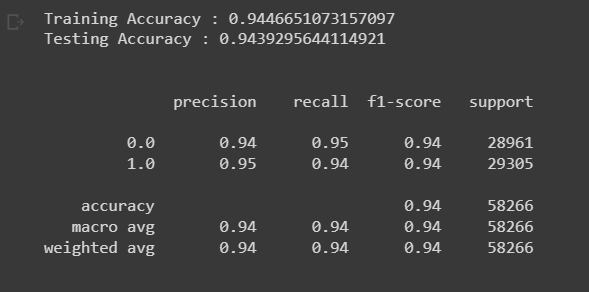

##*4. Decision Tree Alogrithm*

---



In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.999048911467576


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



##*5. Random Forest Alogrithm*

---



In [ ]:
rfc = mymodel(RandomForestClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9998550169920085


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



##*6. XGBClassifier Algorithm*

---



In [ ]:
xgb = mymodel(XGBClassifier())

Training Accuracy : 0.9842399327941622
Testing Accuracy : 0.9834023452451373


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     86106
         1.0       0.98      0.99      0.98     86328

    accuracy                           0.98    172434
   macro avg       0.98      0.98      0.98    172434
weighted avg       0.98      0.98      0.98    172434



##4.1.1 Baseline model Cross-validation


In [ ]:
from sklearn.model_selection import cross_val_score

knn_accuracy = cross_val_score(knn,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
rfc_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
xgb_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)

names = ['KNN','LogReg','DecisionTree','RFC','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),dt_accuracy.mean(),rfc_accuracy.mean(),xgb_accuracy.mean()]

scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

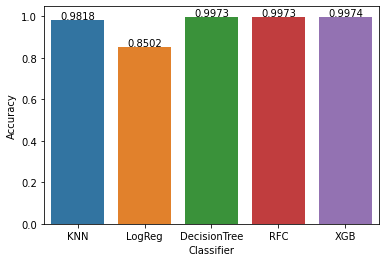

In [ ]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    

In [ ]:
scores # Baseline model Cross-validation

,Algorithm Name,Score
0,KNN,0.981796
1,LogReg,0.850157
2,DecisionTree,0.997321
3,RFC,0.997321
4,XGB,0.997356


##4.2 Second Model HyperParameters Tuning:

##*1. Decision Tree Algorithm*

---



In [ ]:
'''parameters = {
    "criterion":["gini", "entropy"],
    "max_depth": list(range(1,20, 5)),
    "min_samples_leaf": list(range(1, 20, 5))
}
'''
parameters = {
    "criterion":["entropy"],
    "max_depth": [16],
    "min_samples_leaf":[1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1; total time=   2.9s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1; total time=   3.3s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1; total time=   2.7s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1; total time=   2.6s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1; total time=   2.7s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [16],
                         'min_samples_leaf': [1]},
             verbose=2)

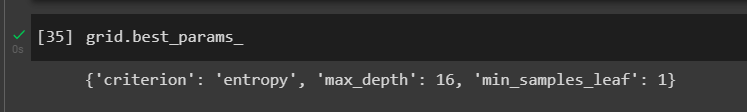



Image refers to the best parameters after tuning them ,for saving time cut outs from the original hyperparameter tuning is added ** 

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1}

In [ ]:
grid.best_score_

0.9980365155566038

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [ ]:
dt2 = mymodel(grid.best_estimator_) # Post- HyperParameter Tuning For Decision Tree

Training Accuracy : 0.9986876966590944
Testing Accuracy : 0.9979296426458819


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



##*3. Logistic Regression Algorithm*

---



In [ ]:
'''parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}'''

parameters = {
    'penalty' : ['l1'], 
    'C'       : [1000.0],
    'solver'  : ['liblinear'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............C=1000.0, penalty=l1, solver=liblinear; total time=   3.6s
[CV] END .............C=1000.0, penalty=l1, solver=liblinear; total time=   3.9s
[CV] END .............C=1000.0, penalty=l1, solver=liblinear; total time=   3.6s
[CV] END .............C=1000.0, penalty=l1, solver=liblinear; total time=   3.6s
[CV] END .............C=1000.0, penalty=l1, solver=liblinear; total time=   3.5s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1000.0], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             verbose=2)

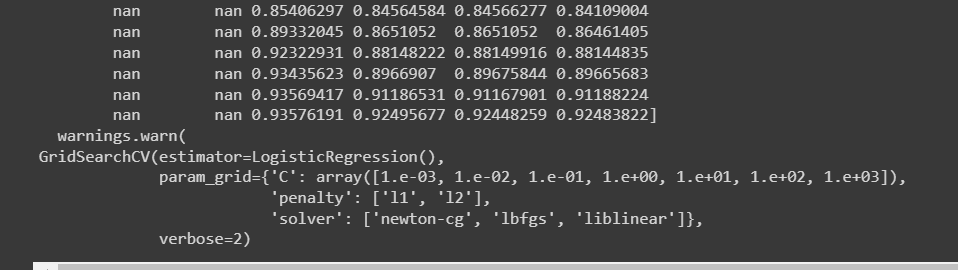

Image refers to the best parameters after tuning them ,for saving time cut outs from the original hyperparameter tuning is added  

In [ ]:
grid.best_params_

{'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

0.920128448227393

In [ ]:
grid.best_estimator_

LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')

In [ ]:
logreg = mymodel(grid.best_estimator_)

Training Accuracy : 0.9201483300442902
Testing Accuracy : 0.9189486992124523


              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     86106
         1.0       0.92      0.92      0.92     86328

    accuracy                           0.92    172434
   macro avg       0.92      0.92      0.92    172434
weighted avg       0.92      0.92      0.92    172434



##*4. KNN Algorithm*

---



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(
    [
        ("sc", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]
)

from sklearn.model_selection import GridSearchCV
parameters = [{"knn__n_neighbors": [3],
              "knn__weights": ["distance"],
              "knn__leaf_size": [15]}]

'''
parameters = [{"knn__n_neighbors": [3, 5, 7, 9],
              "knn__weights": ["uniform", "distance"],
              "knn__leaf_size": [15, 20]}]
              '''
grid = GridSearchCV(pipe, parameters, cv=5, scoring="accuracy")
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15], 'knn__n_neighbors': [3],
                          'knn__weights': ['distance']}],
             scoring='accuracy')

In [ ]:
grid.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

Image refers to the best parameters after tuning them ,for saving time cut outs from the original hyperparameter tuning is added

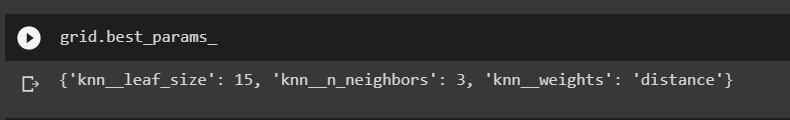

In [ ]:
grid.best_score_

0.9950042996272245

In [ ]:
grid.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=3,
                                      weights='distance'))])

In [ ]:
knn2 = mymodel(grid.best_estimator_)

Training Accuracy : 1.0
Testing Accuracy : 0.9956099145180185


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     86106
         1.0       0.99      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



##*5. XGBClassifier Algorithm*

---



In [ ]:
'''parameters = {'max_depth': [5,6,7,8],
'gamma': [0.01,0.001,0.001],
'min_child_weight':[1,5,10],
'learning_rate': [0.05,0.1, 0.2, 0.3],
'n_estimators':[5,10,20,100]}
'''
parameters = {'max_depth': [5],
'gamma': [0.01],
'min_child_weight':[1],
'learning_rate': [0.3],
'n_estimators':[100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(XGBClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.01, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100; total time=  35.3s
[CV] END gamma=0.01, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100; total time=  34.1s
[CV] END gamma=0.01, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100; total time=  34.2s
[CV] END gamma=0.01, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100; total time=  34.3s
[CV] END gamma=0.01, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100; total time=  34.0s


GridSearchCV(estimator=XGBClassifier(),
             param_grid={'gamma': [0.01], 'learning_rate': [0.3],
                         'max_depth': [5], 'min_child_weight': [1],
                         'n_estimators': [100]},
             verbose=2)

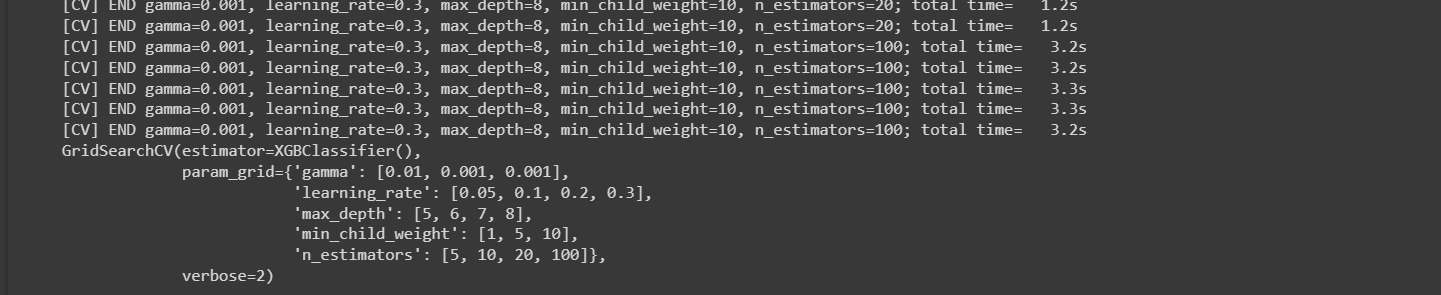

In [ ]:
grid.best_params_

{'gamma': 0.01,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100}

Image refers to the best parameters after tuning them ,for saving time cut outs from the original hyperparameter tuning is added 

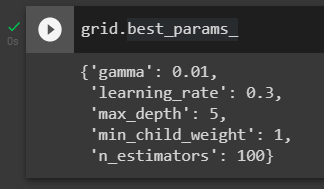

In [ ]:
grid.best_score_

0.9998011661913504

In [ ]:
grid.best_estimator_

XGBClassifier(gamma=0.01, learning_rate=0.3, max_depth=5)

In [ ]:
xgb = mymodel(grid.best_estimator_)

Training Accuracy : 0.9999453206941289
Testing Accuracy : 0.9998028231091316


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



##*6. Random Foreset Algorithm*

---



In [ ]:
'''parameters = {
    'max_depth': [3, 5],
    'max_features':[2,8,9],
    'n_estimators':[50,100],
    'min_samples_split': [3, 7]
}'''

parameters = {
    'max_depth': [5],
    'max_features':[2],
    'n_estimators':[100],
    'min_samples_split': [7]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, max_features=2, min_samples_split=7, n_estimators=100; total time=  22.1s
[CV] END max_depth=5, max_features=2, min_samples_split=7, n_estimators=100; total time=  22.4s
[CV] END max_depth=5, max_features=2, min_samples_split=7, n_estimators=100; total time=  21.8s
[CV] END max_depth=5, max_features=2, min_samples_split=7, n_estimators=100; total time=  22.2s
[CV] END max_depth=5, max_features=2, min_samples_split=7, n_estimators=100; total time=  22.6s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'max_features': [2],
                         'min_samples_split': [7], 'n_estimators': [100]},
             verbose=2)

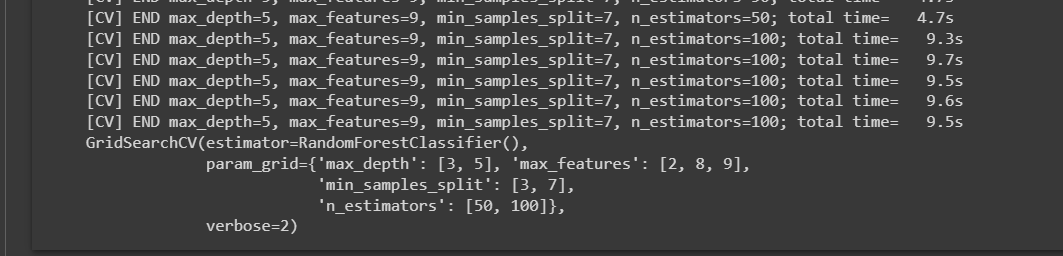

In [ ]:
grid.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 7,
 'n_estimators': 100}

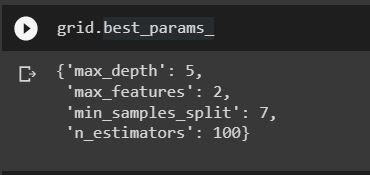

In [ ]:
grid.best_score_

0.9465460194190902

In [ ]:
grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=7)

In [ ]:
rfc = mymodel(grid.best_estimator_)

Training Accuracy : 0.9478260005070263
Testing Accuracy : 0.9480322906155398


              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95     86106
         1.0       0.93      0.96      0.95     86328

    accuracy                           0.95    172434
   macro avg       0.95      0.95      0.95    172434
weighted avg       0.95      0.95      0.95    172434



##4.2 Second Model HyperParameters Tuned Cross-Validation

In [ ]:
knn_accuracy = cross_val_score(knn2,xtest,ytest,cv=3,scoring='accuracy')
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
rfc_accuracy = cross_val_score(rfc,xtest,ytest,cv=3,scoring='accuracy')
xgb_accuracy = cross_val_score(xgb,xtest,ytest,cv=3,scoring='accuracy')


In [ ]:
names = ['KNN','LogReg','DecisionTree','RFC','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),dt_accuracy.mean(),rfc_accuracy.mean(),xgb_accuracy.mean()]

In [ ]:
scores_2nd = pd.DataFrame({'Algorithm Name':names,'Score':score})

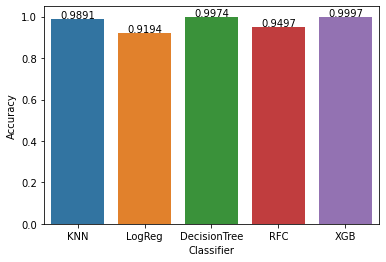

In [ ]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores_2nd)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

In [ ]:
scores_2nd # Cross-validation post HyperParameter Tuning 

,Algorithm Name,Score
0,KNN,0.989109
1,LogReg,0.919413
2,DecisionTree,0.997402
3,RFC,0.949668
4,XGB,0.999658


In [ ]:
scores # Cross-validation for the Base model

,Algorithm Name,Score
0,KNN,0.981796
1,LogReg,0.850157
2,DecisionTree,0.997321
3,RFC,0.997321
4,XGB,0.997356


In [ ]:
scores_2nd['Score'].max() 

0.9996578401011401

In [ ]:
scores['Score'].max() 

0.9973555099342356

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.9998840135936068
ROC : 0.9998839088725658
[[86089    17]
 [    3 86325]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



In [ ]:
train = rfc.score(xtrain, ytrain)
test = rfc.score(xtest, ytest)
    
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



In [ ]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25]}")

Actual Values     : [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0.]
Predicted Values  : [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0.]


In [ ]:
print(f"Actual Values     : {ytest[25:51].values}")
print(f"Predicted Values  : {ypred[25:51]}")

Actual Values     : [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0.]
Predicted Values  : [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0.]


In [ ]:
rfc.predict_proba(xtest)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [5.99880024e-04, 9.99400120e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
ypredprob = rfc.predict_proba(xtest)[:, 1]

In [ ]:
from sklearn.preprocessing import binarize

In [ ]:
ypred = binarize([ypredprob], threshold=0.3)[0]

In [ ]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25].astype(int)}")

Actual Values     : [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0.]
Predicted Values  : [1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0]


In [ ]:
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.9995302550541076
ROC : 0.9995296644344612
[[86026    80]
 [    1 86327]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86106
         1.0       1.00      1.00      1.00     86328

    accuracy                           1.00    172434
   macro avg       1.00      1.00      1.00    172434
weighted avg       1.00      1.00      1.00    172434



In [ ]:
train = rfc.score(xtrain, ytrain)
test = rfc.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")

Training Accuracy - : 1.0
Testing Accuracy -: 0.9998840135936068


In [ ]:
from sklearn.metrics import roc_curve

##5.ROC Curve

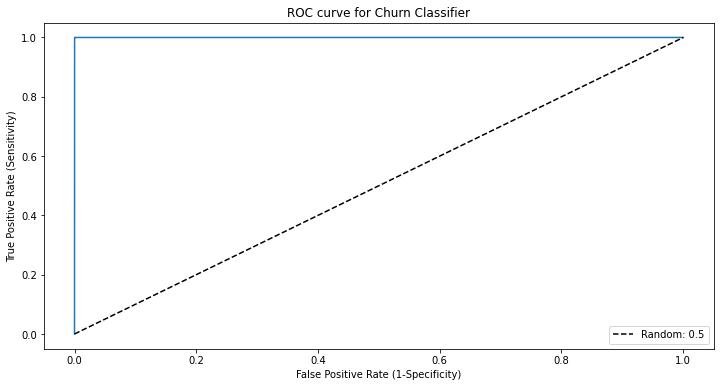

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)

fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')

plt.title("ROC curve for Churn Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc='best')

#plt.grid()
plt.show()           